In [1]:
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
(xTrain, yTrain), (xTest, yTest) = fashion_mnist.load_data()

xTrain = xTrain.reshape(xTrain.shape[0], 28, 28, 1)
xTest = xTest.reshape(xTest.shape[0], 28, 28, 1)


n_classes = 10
yTrain = np_utils.to_categorical(yTrain, n_classes)
yTest = np_utils.to_categorical(yTest, n_classes)

model = Sequential()
model.add(Conv2D(30, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

history = model.fit(xTrain, yTrain, batch_size=256, epochs=10, validation_data=(xTest, yTest))

Epoch 1/10
235/235 [==============================] - 25s 105ms/step - loss: 5.5154 - accuracy: 0.7891 - val_loss: 0.5060 - val_accuracy: 0.8454
Epoch 2/10
235/235 [==============================] - 23s 97ms/step - loss: 0.3965 - accuracy: 0.8688 - val_loss: 0.4159 - val_accuracy: 0.8657
Epoch 3/10
235/235 [==============================] - 23s 96ms/step - loss: 0.3008 - accuracy: 0.8953 - val_loss: 0.3901 - val_accuracy: 0.8748
Epoch 4/10
235/235 [==============================] - 23s 97ms/step - loss: 0.2633 - accuracy: 0.9063 - val_loss: 0.3834 - val_accuracy: 0.8794
Epoch 5/10
235/235 [==============================] - 23s 96ms/step - loss: 0.2253 - accuracy: 0.9197 - val_loss: 0.3788 - val_accuracy: 0.8790
Epoch 6/10
235/235 [==============================] - 23s 100ms/step - loss: 0.1957 - accuracy: 0.9294 - val_loss: 0.4047 - val_accuracy: 0.8791
Epoch 7/10
235/235 [==============================] - 27s 113ms/step - loss: 0.1771 - accuracy: 0.9362 - val_loss: 0.3941 - val_accura

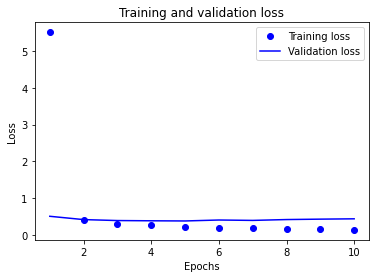

In [3]:
history_dict = history.history
history_dict.keys()

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()